*`Mounting and working from  Google Drive`*

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
#Load the necessary Libraries  for the project 
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.core.dtypes.missing import isna
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## <a id='2'>Loaner Data Set</a>

In the **'loan.csv'** file, we can find the loans issues througth the time period from 2007 to 2011 and i am going to use the dataset to identify the risk in lending 

### Critical case study 

If the applicant is ***likely to repay the loan***, then not approving the loan results in a ***loss of business*** to the company


If the applicant is ***not likely to repay the loan***, i.e. he/she is likely to default, then approving the loan may lead to a ***financial loss*** for the company

## <a id='2'>1.0 Data</a>

In [223]:
# Loading Data from the Google Drive, If you are working pl change below line of code to 
# get loan.csv from your desired folder 
loandataset = pd.read_csv('/content/drive/MyDrive/Upgrad/Data Analysis/CaseStudy/loan.csv')

loandataset.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## <a id='1.1'>1.1 Data overview</a>

In [224]:
# Loading the Info to get the size
loandataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [225]:
# Loading the shppe to get the size
loandataset.shape

(39717, 111)

## <a id='1.1'>1.1 Data Cleanup</a>

Based on our initial analysis we found we have lots of columns with N/A , no values and we have decide to first clean up the columns 

In [ ]:
loandataset.isnull().sum()

In [226]:
#Delete the columns having NA for 80 percent of rows
for i in loandataset.columns:
  percent_NA = round(100*(loandataset[i].isnull().sum()/len(loandataset.index)),2) 
  if percent_NA >= 80:
    loandataset = loandataset.drop(columns=i)
    
#Delete the columns having only one single value for all rows
for i in loandataset.columns:  
  if loandataset[i].nunique() == 1:
    loandataset = loandataset.drop(columns=i)

In [227]:
# code used to check the null value 
loandataset.isnull().sum()  

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
open_acc                       0
pub_rec                        0
revol_bal 

# <a id='2'>1.2 Data Manipulation</a>

Below section we are going to add column for analysis and cleanup the data like % in int rate and $ in value for better math calculation

In [228]:
#ChargedOff_loandataset =  loandataset[loandataset["loan_status"] == "Charged Off"]
# We have 3 type of loan and in that Current is not a valid loan type and removing the same for future analysis
#array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

loandataset = loandataset[loandataset["loan_status"] != "Current"]

In [229]:
# distribution of the employment length
def emp_to_num(term):
    if pd.isna(term):
        return None
    elif term[2]=='+':
        return 10
    elif term[0]=='<':
        return 0
    else:
        return int(term[0])

loandataset['emp_length_num'] = loandataset['emp_length'].apply(emp_to_num)

#(loandataset['emp_length_num'].value_counts().sort_index()/len(loandataset)).plot.bar()

In [230]:
# Removing all the data where employee length is null
loandataset = loandataset[loandataset["emp_length"].notnull()]

In [231]:
#transform the loan-status into a binary variable where 'Charged Off' = 1 and 'Fully Paid' = 0.
loandataset['loan_status_bin'] = loandataset['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [232]:
# Identifing short term and long term employee
loandataset['long_emp'] = loandataset['emp_length'].apply(lambda x: 1*(x=='10+ years'))
loandataset['short_emp'] = loandataset['emp_length'].apply(lambda x: 1*(x=='1 year' or x=='< 1 year'))


In [233]:
# Removing % from the necessary value 
loandataset['int_rate'] = loandataset['int_rate'].str[:-1].astype(float)

In [234]:
#loan_amnt_shortage is a new column where he or she needs more money but did not receive the same 
# potential to borrow more 
loandataset['loan_amnt_shortage'] = loandataset['loan_amnt'] - loandataset['funded_amnt_inv']

loandataset['loan_amnt_shortage_Per'] = loandataset['loan_amnt_shortage']/loandataset['loan_amnt'] * 100


In [235]:
# Filtering the data and only analyzing the Charged Off value and Fully Paid 

ChargedOff_loandataset =  loandataset[loandataset["loan_status"] == "Charged Off"]

fullypaid_loandataset =  loandataset[loandataset["loan_status"] == "Fully Paid"]

# <a id='2'>2. Exploratory Data Analysis</a>

## <a id='3.1'>3.1. Customer data based on Home Ownership:</a> :

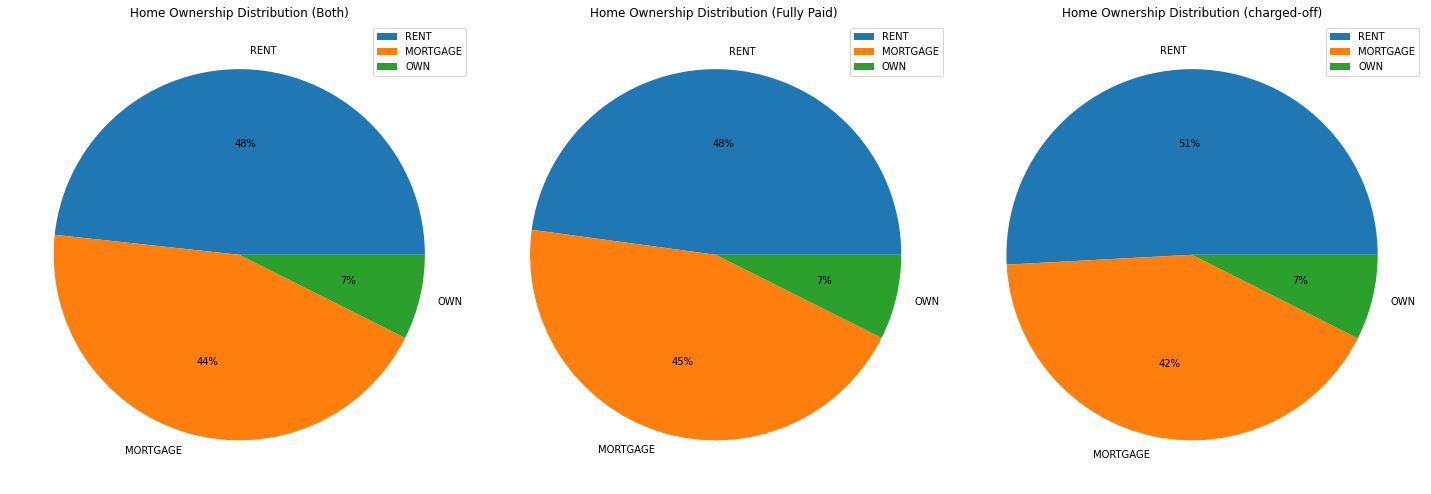

In [236]:
#home ownership vs default rate 

ownership_loanstatus_charged  =  ChargedOff_loandataset[ChargedOff_loandataset['home_ownership'].isin(['MORTGAGE','OWN', 'RENT'])]['home_ownership'].value_counts().reset_index()
ownership_loanstatus_fullypaid =  fullypaid_loandataset[fullypaid_loandataset['home_ownership'].isin(['MORTGAGE','OWN', 'RENT'])]['home_ownership'].value_counts().reset_index()
ownership_loanstatus =  loandataset[loandataset['home_ownership'].isin(['MORTGAGE','OWN', 'RENT'])]['home_ownership'].value_counts().reset_index()

fig, axs  = plt.subplots(nrows = 1, ncols=3,figsize=(20,8))

axs[0].pie(ownership_loanstatus['home_ownership'], labels=ownership_loanstatus['index'],  autopct='%.0f%%')
axs[0].legend()
axs[0].set_title("Home Ownership Distribution (Both)")

axs[1].pie(ownership_loanstatus_fullypaid['home_ownership'], labels=ownership_loanstatus_fullypaid['index'],  autopct='%.0f%%')
axs[1].legend()
axs[1].set_title("Home Ownership Distribution (Fully Paid) ")

axs[2].pie(ownership_loanstatus_charged['home_ownership'], labels=ownership_loanstatus_charged['index'],  autopct='%.0f%%')
axs[2].legend()
axs[2].set_title("Home Ownership Distribution (charged-off)")


plt.tight_layout()
plt.show()

## insights:

1.    We have 3% increase in Rental borrowers  **not paying** the loan  
2.    We have 4% decrease in Mortage borrowers **paying** the loan
3.    No Pattern with Own house






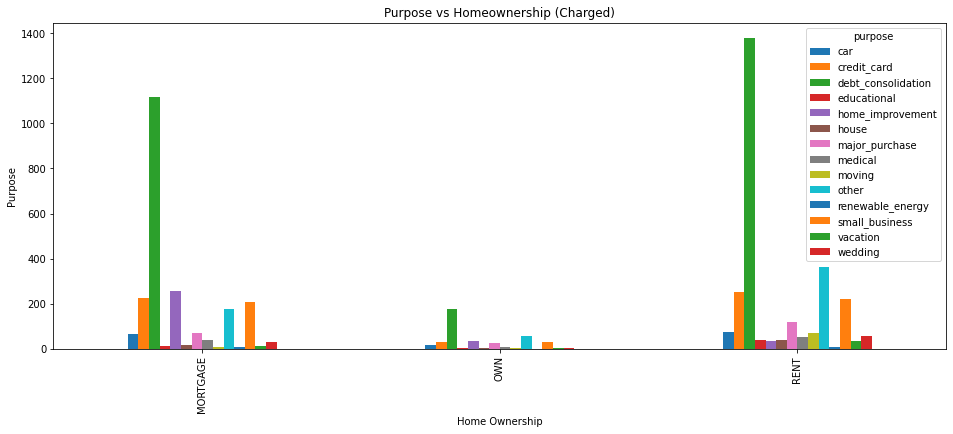

In [237]:
# Checking if verification status is causing ant issues 

ownership_loanstatus_charged  =  ChargedOff_loandataset[ChargedOff_loandataset['home_ownership'].isin(['MORTGAGE','OWN', 'RENT'])]
ownership_loanstatus_fullypaid =  fullypaid_loandataset[fullypaid_loandataset['home_ownership'].isin(['MORTGAGE','OWN', 'RENT'])]

pd.crosstab(ownership_loanstatus_charged["home_ownership"],ownership_loanstatus_charged["purpose"]).plot(kind="bar",figsize=(16,6))
plt.title('Purpose vs Homeownership (Charged)')
plt.xlabel('Home Ownership')
plt.ylabel('Purpose')
plt.show()

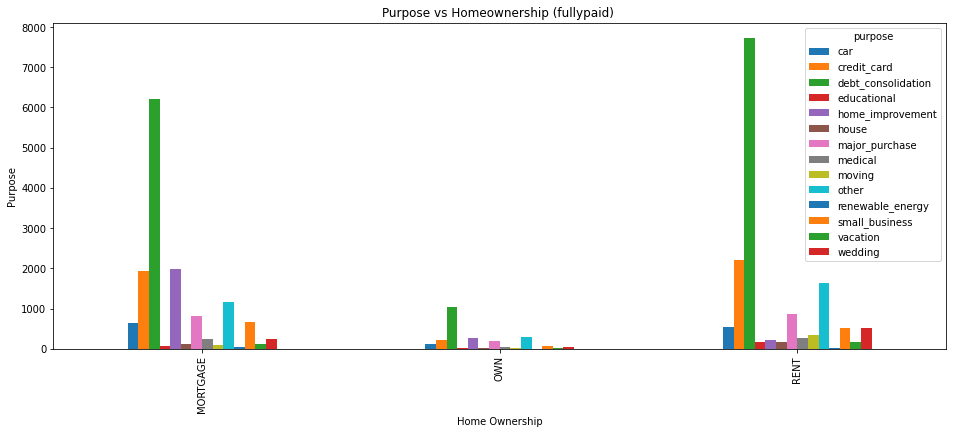

In [238]:
ownership_loanstatus_fullypaid =  fullypaid_loandataset[fullypaid_loandataset['home_ownership'].isin(['MORTGAGE','OWN', 'RENT'])]

pd.crosstab(ownership_loanstatus_fullypaid["home_ownership"],ownership_loanstatus_fullypaid["purpose"]).plot(kind="bar",figsize=(16,6))
plt.title('Purpose vs Homeownership (fullypaid) ')
plt.xlabel('Home Ownership')
plt.ylabel('Purpose')
plt.show()

# recommendation:

1. If the  borrower has a ***OWN*** home its a safe loan we can approve 


## <a id='3.2'>3.2. Customer Data Analysis based on employment length</a>

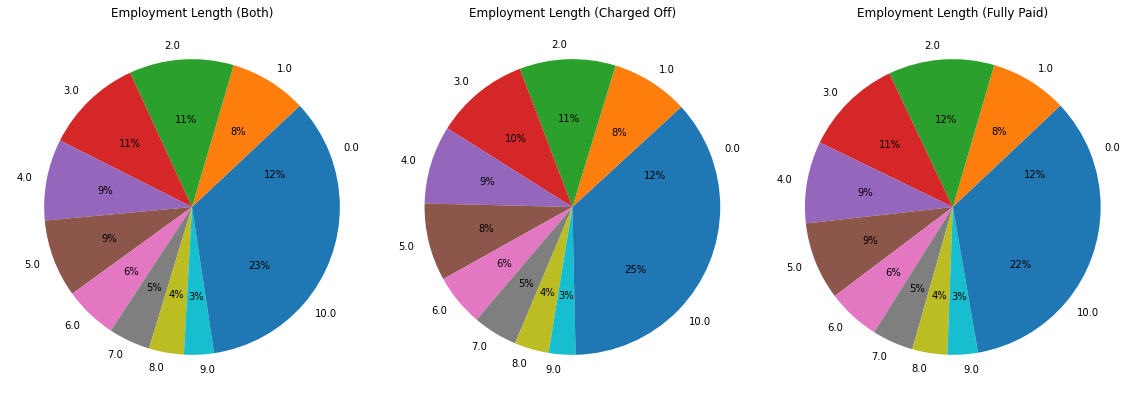

In [240]:
# analyzing  if employee lenght is playing any major roll on loan repayment payment 
employee_length = (loandataset['emp_length_num'].value_counts().sort_index()/len(loandataset)).reset_index()

employee_length_chargedoff = (ChargedOff_loandataset['emp_length_num'].value_counts().sort_index()/len(ChargedOff_loandataset)).reset_index()
employee_length_fullypaid = (fullypaid_loandataset['emp_length_num'].value_counts().sort_index()/len(fullypaid_loandataset)).reset_index()

fig, axs  = plt.subplots(nrows = 1, ncols=3,figsize=(16,6))

axs[0].pie(employee_length['emp_length_num'], labels=employee_length['index'],  autopct='%.0f%%')
#axs[0].legend()
axs[0].set_title("Employment Length (Both)")


axs[1].pie(employee_length_chargedoff['emp_length_num'], labels=employee_length_chargedoff['index'],  autopct='%.0f%%')
#axs[0].legend()
axs[1].set_title("Employment Length (Charged Off)")


axs[2].pie(employee_length_fullypaid['emp_length_num'], labels=employee_length_fullypaid['index'],  autopct='%.0f%%')
#axs[0].legend()
axs[2].set_title("Employment Length (Fully Paid)")



plt.tight_layout()
plt.show()

## insights:

1.    Borrower with **0,1, 2, 3** are paying the loan on time of which 0 Years are on time in paying the load 
2.    Borrower with **more number years(4 plus)** of exp are not paying the load on time
3.    More than **10 plus years** of exp people are getting more personnel loan 


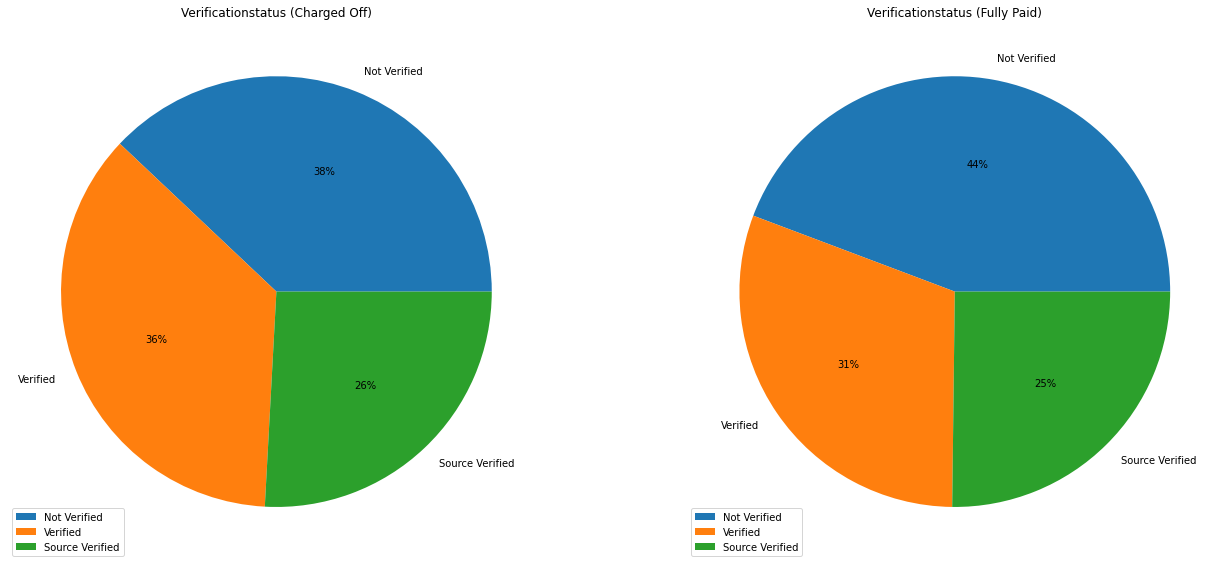

In [241]:
# Get verification status info for all the loan type 
verification_status  = loandataset['verification_status'].value_counts().reset_index()
verification_status_ChargedOff  = ChargedOff_loandataset['verification_status'].value_counts().reset_index()
verification_status_fullypaid  = fullypaid_loandataset['verification_status'].value_counts().reset_index()

fig, axs  = plt.subplots(nrows = 1, ncols=2,figsize=(20,8))

axs[0].pie(verification_status_ChargedOff['verification_status'], labels=verification_status_ChargedOff['index'],  autopct='%.0f%%')
axs[0].legend()
axs[0].set_title("Verificationstatus (Charged Off)")

axs[1].pie(verification_status_fullypaid['verification_status'], labels=verification_status_fullypaid['index'],  autopct='%.0f%%')
axs[1].legend()
axs[1].set_title("Verificationstatus (Fully Paid)")

plt.tight_layout()
plt.show()

## insights:

1.    If the **source is verified** then we have the probability of getting the loan getting paid back properly 

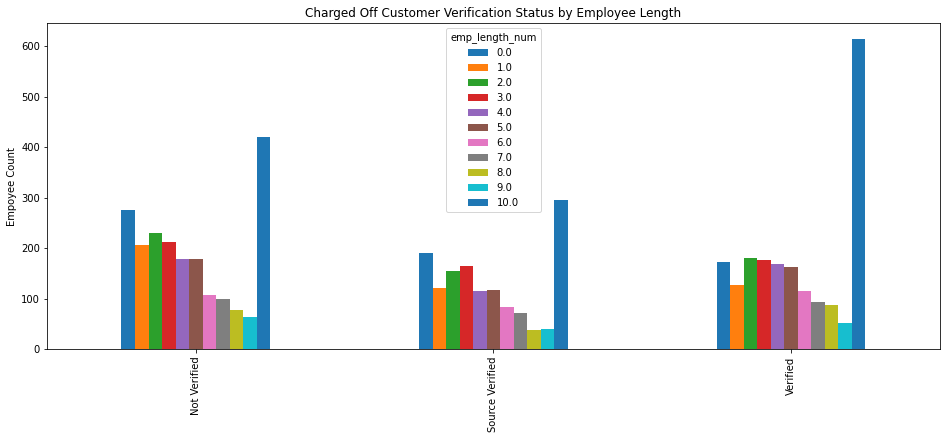

In [242]:
# Checking if verification status is causing any issues /impact
pd.crosstab(ChargedOff_loandataset["verification_status"],ChargedOff_loandataset["emp_length_num"]).plot(kind="bar",figsize=(16,6))
plt.title('Charged Off Customer Verification Status by Employee Length')
plt.xlabel('')
plt.ylabel('Empoyee Count')
plt.show()

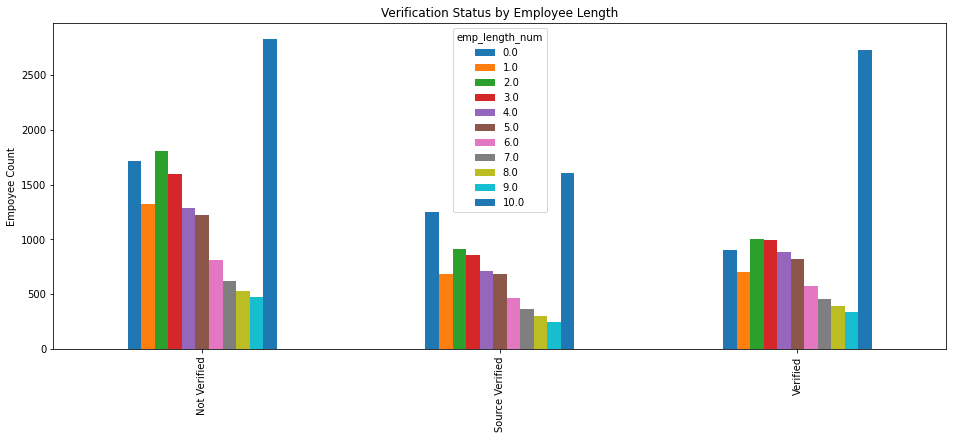

In [243]:
# Checking if verification status is causing any issues /impact
pd.crosstab(fullypaid_loandataset["verification_status"],fullypaid_loandataset["emp_length_num"]).plot(kind="bar",figsize=(16,6))
plt.title('Verification Status by Employee Length')
plt.xlabel('')
plt.ylabel('Empoyee Count')
plt.show()

## insights:

1.    Again the above chart proves If the **source is verified** then we have the probability of getting the loan fully paid

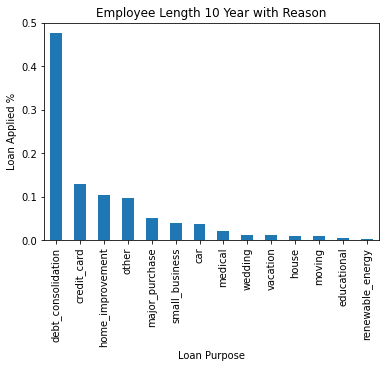

In [ ]:
# Checking why 10 plus years are applying for more loans and the purppose of the loan 
loan_purpose_10_plus =  loandataset[loandataset['emp_length_num'] >= 10]

(loan_purpose_10_plus['purpose'].value_counts()/len(loan_purpose_10_plus)).plot.bar()
plt.title('Employee Length 10 Year with Reason')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Applied %')
plt.show()

# recommendation:

1. Have the source of Income verified before approving the loan by **3rd Party **
2. If Employment length is longer (10 Years plus) then have source verification a mandatory step  if the purpose is for ***debt-consilidation***  and ***credit card***

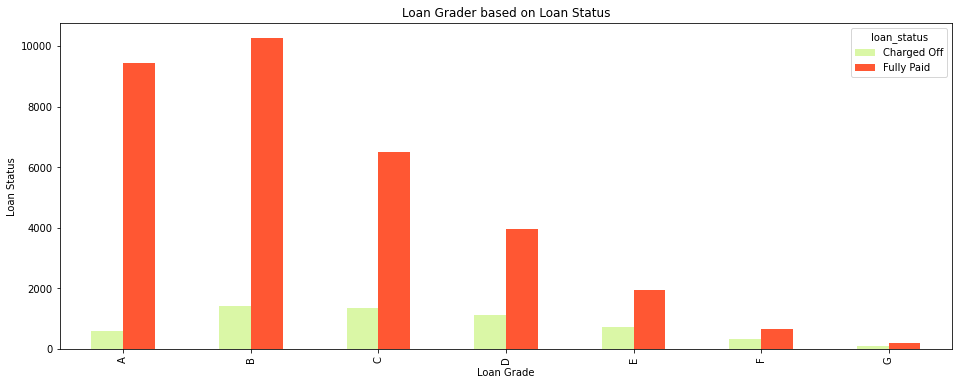

In [ ]:
# Checking any pattern between grade and loan status
pd.crosstab(loandataset["grade"],loandataset["loan_status"]).plot(kind="bar",figsize=(16,6),color=['#DAF7A6','#FF5733' ])
plt.title('Loan Grader based on Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Loan Status')
plt.show()

## <a id='3.3'>3.3. Customer Annual Income and Loan Repayment </a>

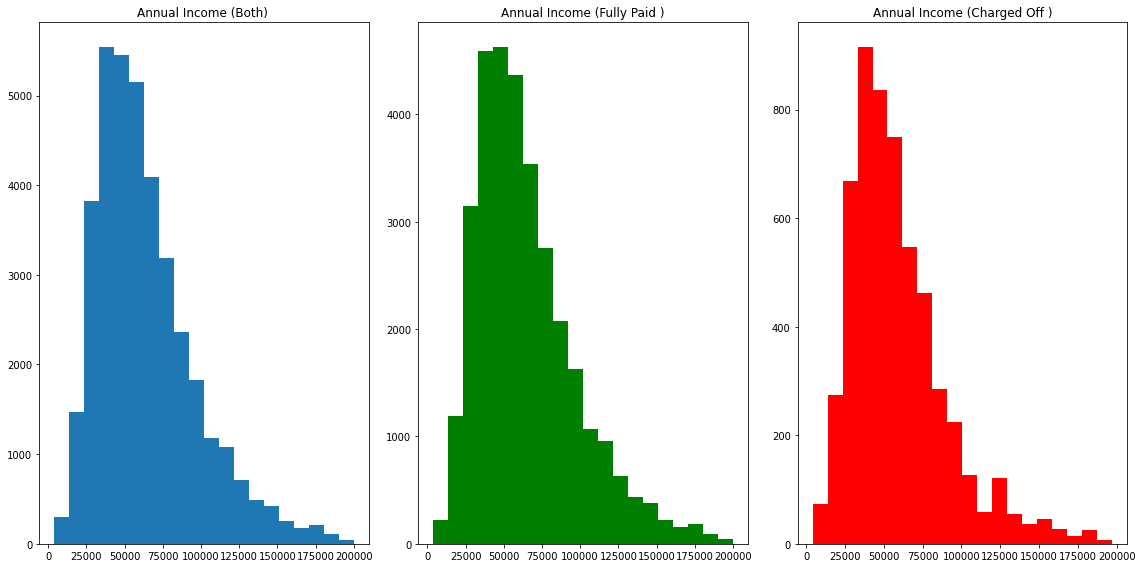

In [ ]:
# Checking if annual income in having any impact 
fig, axs  = plt.subplots(nrows = 1, ncols=3,figsize=(16,8))

axs[0].hist(loandataset[loandataset['annual_inc']<200000]['annual_inc'],bins=20)
axs[0].set_title("Annual Income (Both) ")

axs[1].hist(fullypaid_loandataset[fullypaid_loandataset['annual_inc']<200000]['annual_inc'],bins=20, color=['green'])
axs[1].set_title("Annual Income (Fully Paid )")

axs[2].hist(ChargedOff_loandataset[ChargedOff_loandataset['annual_inc']<200000]['annual_inc'],bins=20,color=['red'])
axs[2].set_title("Annual Income (Charged Off )")

plt.tight_layout()
plt.show()

## insights:

1.    Above  chart shows a pattern on on the  loan borrower has income rage between **25,000  -  100,000** applying for the loan and in need of money 
2.    If the income rage is **125,00 or higher** repayment rate is much lower

## <a id='3.4'>3.4. Customer Installment and Loan Repayment </a>

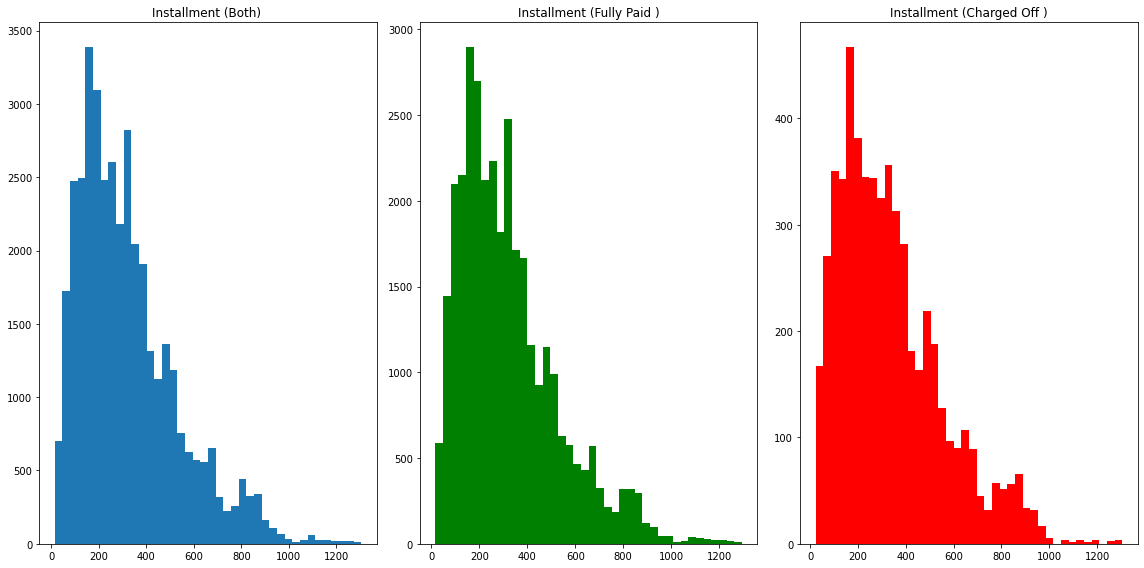

In [ ]:
# Checking if annual income in having any impact 
fig, axs  = plt.subplots(nrows = 1, ncols=3,figsize=(16,8))

axs[0].hist(loandataset['installment'],bins=40)
axs[0].set_title("Installment (Both) ")

axs[1].hist(fullypaid_loandataset['installment'],bins=40, color=['green'])
axs[1].set_title("Installment (Fully Paid )")

axs[2].hist(ChargedOff_loandataset['installment'],bins=40, color=['red'])
axs[2].set_title("Installment (Charged Off )")

plt.tight_layout()
plt.show()

## insights:

1.    Above  chart shows a pattern on the  Installment (If installment is greater than **500 plus**) repayment rate is much lower

## <a id='3.5'>3.5. Customer Debt and Income Ratio </a>

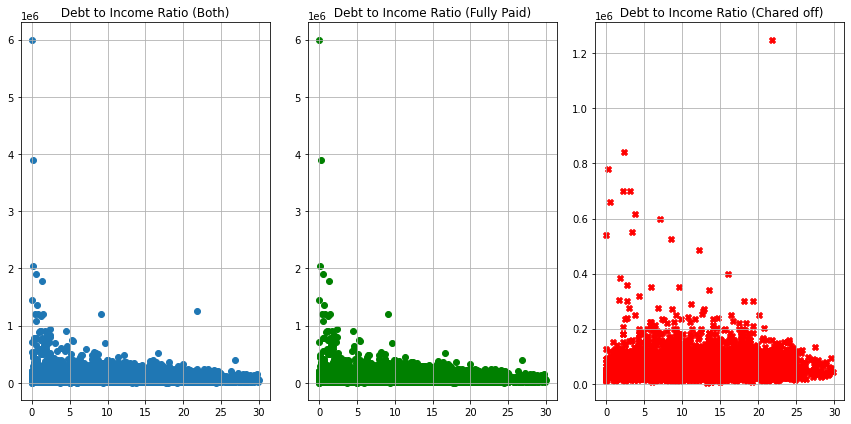

In [245]:
# Checking if Debt to Income Ration is having any impact
fig, axs  = plt.subplots(nrows = 1, ncols=3,figsize=(12,6))

axs[0].scatter(loandataset['dti'], loandataset['annual_inc'])
axs[0].set_title(" Debt to Income Ratio (Both) ")
axs[0].grid()


axs[1].scatter(fullypaid_loandataset['dti'], fullypaid_loandataset['annual_inc'],color=['green'])
axs[1].set_title(" Debt to Income Ratio (Fully Paid) ")
axs[1].grid()

axs[2].scatter(ChargedOff_loandataset['dti'], ChargedOff_loandataset['annual_inc'],color=['red'],marker="X")
axs[2].set_title(" Debt to Income Ratio (Chared off)")
axs[2].grid()

plt.tight_layout()
plt.show()


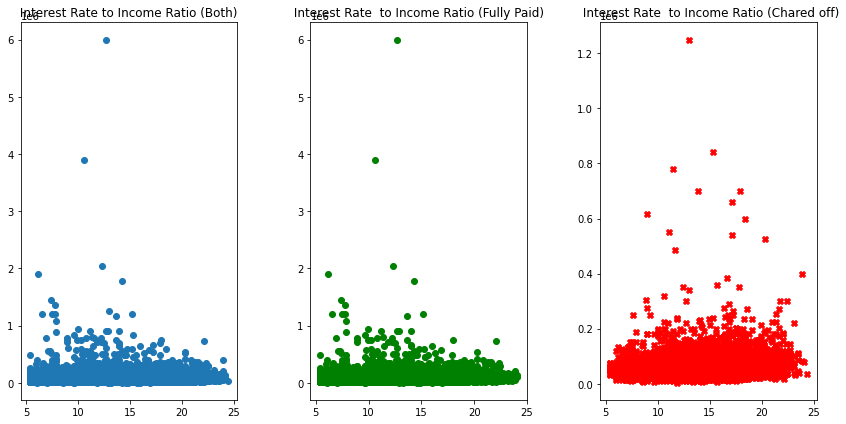

In [246]:
# Checking if Interest Rate to Income  is having any impact

fig, axs  = plt.subplots(nrows = 1, ncols=3,figsize=(12,6))

axs[0].scatter(loandataset['int_rate'], loandataset['annual_inc'])
axs[0].set_title(" Interest Rate to Income Ratio (Both) ")

axs[1].scatter(fullypaid_loandataset['int_rate'], fullypaid_loandataset['annual_inc'],color=['green'])
axs[1].set_title(" Interest Rate  to Income Ratio (Fully Paid) ")

axs[2].scatter(ChargedOff_loandataset['int_rate'], ChargedOff_loandataset['annual_inc'],color=['red'],marker="X")
axs[2].set_title(" Interest Rate  to Income Ratio (Chared off)")

plt.tight_layout()
plt.show()

## <a id='3.6'>3.6. Loan Requested amount vs Loan Approved Amount </a>

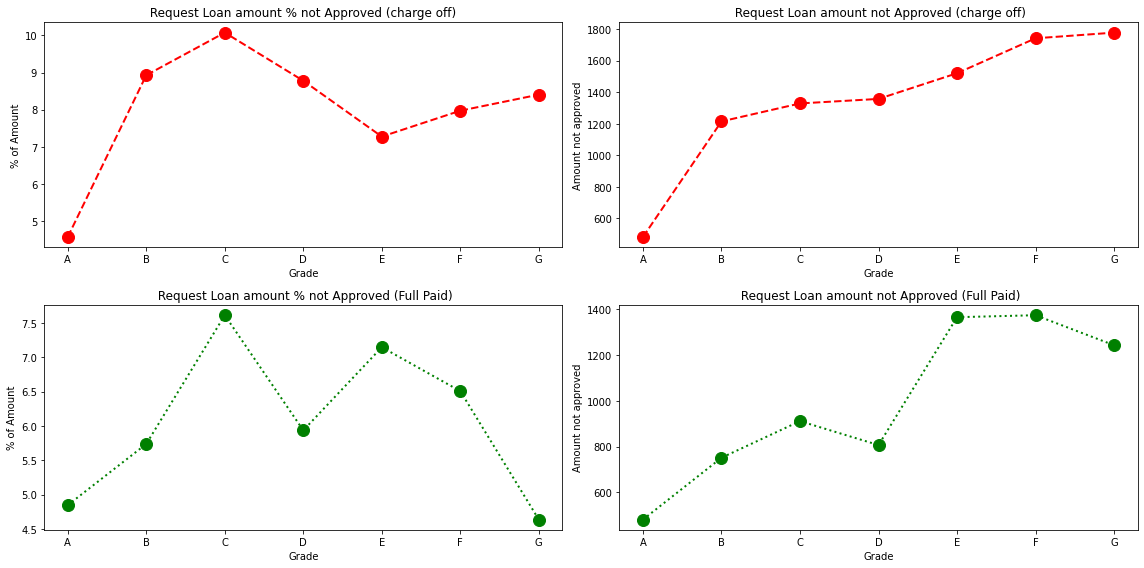

In [ ]:
# Grade vs interest Rate 
chargeoff_grade_vs_shortper = ChargedOff_loandataset.groupby('grade')['loan_amnt_shortage_Per'].mean().reset_index() 
chargeoff_grade_vs_shortamt = ChargedOff_loandataset.groupby('grade')['loan_amnt_shortage'].mean().reset_index() 

fullypaid_grade_vs_shortper = fullypaid_loandataset.groupby('grade')['loan_amnt_shortage_Per'].mean().reset_index() 
fullypaid_grade_vs_shortamt = fullypaid_loandataset.groupby('grade')['loan_amnt_shortage'].mean().reset_index() 

fullypaid_grade_vs_shortperx = fullypaid_loandataset.groupby('grade')['loan_amnt'].mean().reset_index() 
fullypaid_grade_vs_shortamtx = fullypaid_loandataset.groupby('grade')['loan_amnt'].mean().reset_index() 

fig, axs  = plt.subplots(nrows = 2, ncols=2,figsize=(16,8))


axs[0,0].plot(chargeoff_grade_vs_shortper['grade'] , chargeoff_grade_vs_shortper['loan_amnt_shortage_Per'],color='red',marker='o', linestyle='dashed',linewidth=2, markersize=12)
axs[0,0].set_title(" Request Loan amount % not Approved (charge off) ")
axs[0,0].set_xlabel('Grade')
axs[0,0].set_ylabel('% of Amount')


axs[0,1].plot(chargeoff_grade_vs_shortamt['grade'] , chargeoff_grade_vs_shortamt['loan_amnt_shortage'],color='red',marker='o', linestyle='dashed',linewidth=2, markersize=12 )
axs[0,1].set_title(" Request Loan amount not Approved (charge off)")
axs[0,1].set_xlabel('Grade')
axs[0,1].set_ylabel('Amount not approved')

axs[1,0].plot(fullypaid_grade_vs_shortper['grade'] , fullypaid_grade_vs_shortper['loan_amnt_shortage_Per'] ,color='green',marker='o', linestyle=':',linewidth=2, markersize=12)
axs[1,0].set_title(" Request Loan amount % not Approved (Full Paid)")
axs[1,0].set_xlabel('Grade')
axs[1,0].set_ylabel('% of Amount')


axs[1,1].plot(fullypaid_grade_vs_shortamt['grade'] , fullypaid_grade_vs_shortamt['loan_amnt_shortage'] ,color='green',marker='o', linestyle=':',linewidth=2, markersize=12)
axs[1,1].set_title(" Request Loan amount not Approved (Full Paid)")
axs[1,1].set_xlabel('Grade')
axs[1,1].set_ylabel('Amount not approved')


plt.tight_layout()
plt.show()

# recommendation:

1. When the approved amount is lower than loan requested amount we see a pattern of more Charge Off customer and it is also high in based on Loan Grade 


**Getting Initial Loan Analysis  Data for All Data Set  ➰**

Below chat gives an overview of Loan amount and the relationship between the Loan attribute and Indivdiual attribute

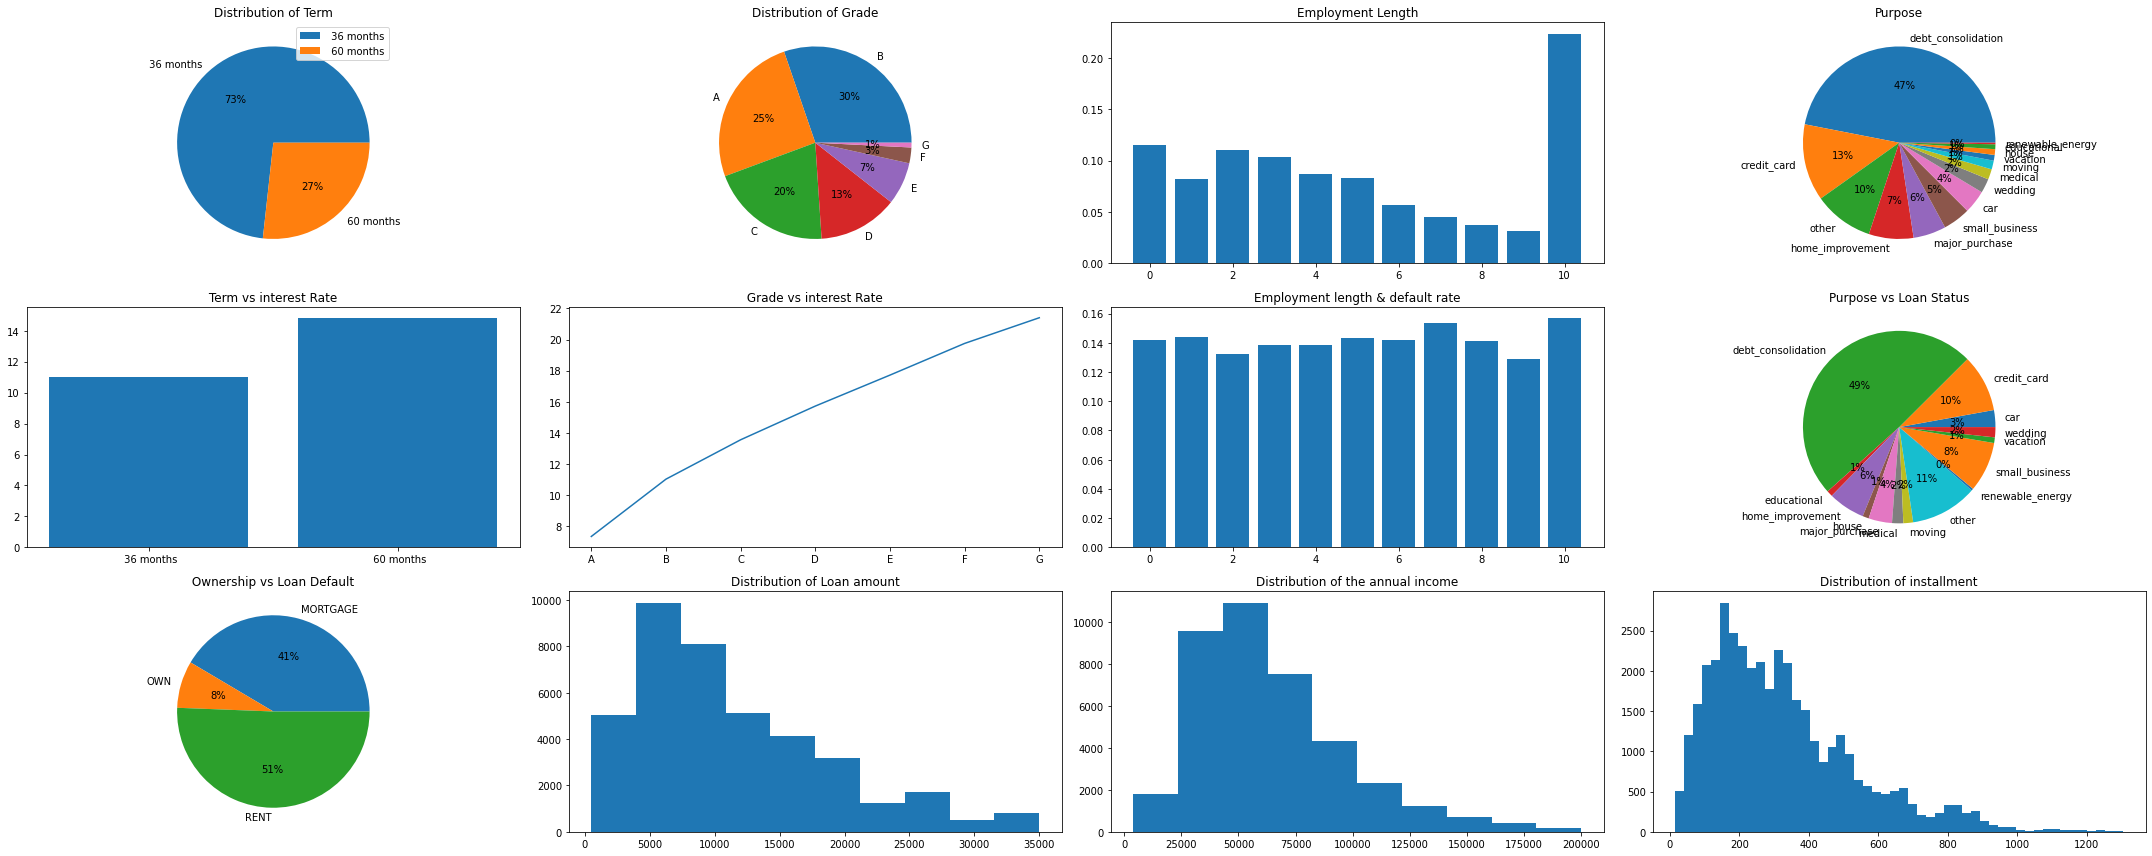

In [ ]:
term_data_1 =  loandataset['term'].value_counts().reset_index()

#distribution of grades
grade_data_1 =  loandataset['grade'].value_counts().reset_index()

purpose_data_1 = loandataset['purpose'].value_counts().reset_index()
state_data_1 = loandataset['addr_state'].value_counts().reset_index()

# distribution of the employment length
employee_length_data_1 = (loandataset['emp_length_num'].value_counts().sort_index()/len(loandataset)).reset_index()

# connection between employment length and default rate
employee_length_def_rate =  loandataset.groupby('emp_length_num')['loan_status_bin'].mean().reset_index()

# Grade vs interest Rate 
grade_vs_intrate = loandataset.groupby('grade')['int_rate'].mean().reset_index() 

# Term vs Interest 
term_vs_intrate = loandataset.groupby('term')['int_rate'].mean().reset_index() 

# Purpose vs Loan status 
purpose_loanstatus = loandataset.groupby('purpose')['loan_status_bin'].sum().reset_index() 

#owner ship vs default rate 
ownership_loanstatus = loandataset[loandataset['home_ownership'].isin(['MORTGAGE','OWN', 'RENT'])].groupby('home_ownership')['loan_status_bin'].sum().reset_index()

fig, axs  = plt.subplots(nrows = 3, ncols=4,figsize=(30,12))

#*******************************
# Term Analysis on Zero column 
#*******************************
axs[0,0].pie(term_data_1['term'], labels=term_data_1['index'],  autopct='%.0f%%')
axs[0,0].legend()
axs[0,0].set_title("Distribution of Term")

axs[1,0].bar(term_vs_intrate['term'] , term_vs_intrate['int_rate'] )
axs[1,0].set_title(" Term vs interest Rate ")

axs[2,0].pie(ownership_loanstatus['loan_status_bin'] , labels=ownership_loanstatus['home_ownership'],  autopct='%.0f%%' )
axs[2,0].set_title(" Ownership vs Loan Default ")


#*******************************
# Grade  Analysis on First  column 
#*******************************
axs[0,1].pie(grade_data_1['grade'], labels=grade_data_1['index'],  autopct='%.0f%%')
#axs[0,1].legend()
axs[0,1].set_title("Distribution of Grade")

axs[1,1].plot(grade_vs_intrate['grade'] , grade_vs_intrate['int_rate'] )
axs[1,1].set_title(" Grade vs interest Rate ")

axs[2,1].hist(loandataset.loan_amnt)
axs[2,1].set_title("Distribution of Loan amount")


#***************************************
# Employement  Analysis on Second column 
#***************************************
axs[0,2].bar(employee_length_data_1['index'] , employee_length_data_1['emp_length_num'] )
axs[0,2].set_title("Employment Length")


axs[1,2].bar(employee_length_def_rate['emp_length_num'] , employee_length_def_rate['loan_status_bin'] )
axs[1,2].set_title("Employment length & default rate")

axs[2,2].hist(loandataset[loandataset['annual_inc']<200000]['annual_inc'])
axs[2,2].set_title("Distribution of the annual income")

#***************************************
# Purpose Analysis on Third column 
#***************************************
axs[0,3].pie(purpose_data_1['purpose'], labels=purpose_data_1['index'],  autopct='%.0f%%')
axs[0,3].set_title("Purpose")

axs[1,3].pie(purpose_loanstatus['loan_status_bin'], labels=purpose_loanstatus['purpose'] ,  autopct='%.0f%%'  )
axs[1,3].set_title("Purpose vs Loan Status")


axs[2,3].hist(loandataset['installment'],bins=50)
axs[2,3].set_title("Distribution of installment")

plt.tight_layout()
plt.show()

## insights:

1. Majority of the loan is for 36 month 
2. General Borrower have 10 plus years of exp 
3. Majority of the loan amount are used for debt consolidation and Credit card payment 
4. Interest rate is more for 60 month term 
5. Interest rate are higher for Higher Grade for example 22% rate for **Grade G** 
6. Default rates are sliigthy higher for people with 7 plus years of exp 
7. Borrower with own home has lesser loan default amount 
8. Majority of the below income are between 25k  to 100k

## **Getting  Loan Analysis  Data for all the Charged Off Loans ⚾ **

Below chart gives an overview of Loan amount and the relationship between the Loan attribute and Indivdiual attribute for all the unpaid loan about based on **Charged off** Value 

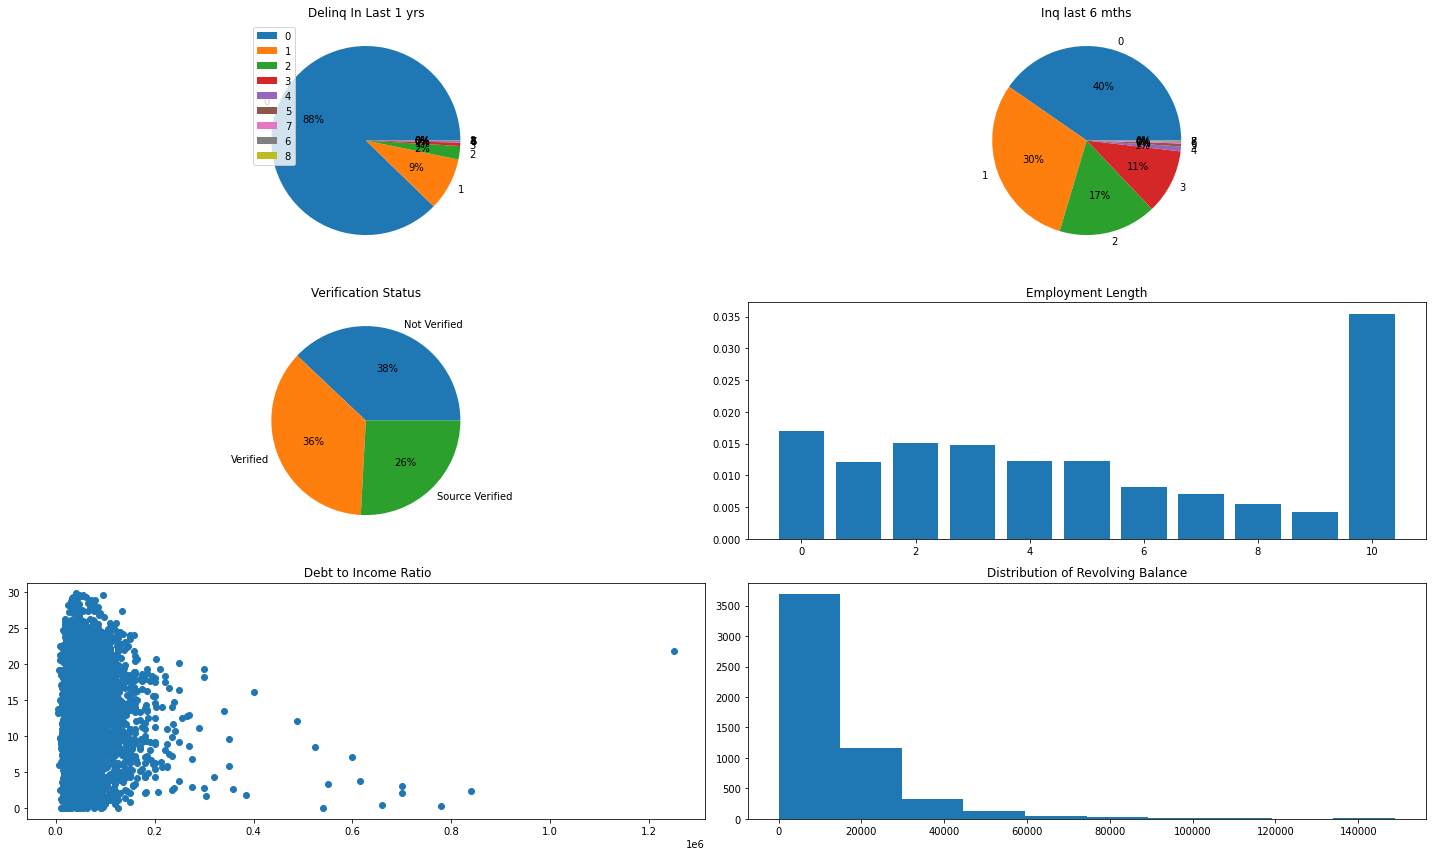

In [ ]:

term_data_1 =  ChargedOff_loandataset['delinq_2yrs'].value_counts().reset_index()

#distribution of grades
grade_data_1 =  ChargedOff_loandataset['inq_last_6mths'].value_counts().reset_index()

purpose_data_1 = ChargedOff_loandataset['purpose'].value_counts().reset_index()
state_data_1 = ChargedOff_loandataset['addr_state'].value_counts().reset_index()

# Get verification status info 
verification_status  = ChargedOff_loandataset['verification_status'].value_counts().reset_index()

# distribution of the employment length
employee_length_data_1 = (ChargedOff_loandataset['emp_length_num'].value_counts().sort_index()/len(loandataset)).reset_index()

# connection between employment length and default rate
employee_length_def_rate =  ChargedOff_loandataset.groupby('emp_length_num')['loan_status_bin'].mean().reset_index()


fig, axs  = plt.subplots(nrows = 3, ncols=2,figsize=(20,12))

#*******************************
#  First  column 
#*******************************
axs[0,0].pie(term_data_1['delinq_2yrs'], labels=term_data_1['index'],  autopct='%.0f%%')
axs[0,0].legend()
axs[0,0].set_title("Delinq In Last 1 yrs")

axs[1,0].pie(verification_status['verification_status'], labels=verification_status['index'],  autopct='%.0f%%')
axs[1,0].set_title("Verification Status")

axs[2,0].scatter(ChargedOff_loandataset['annual_inc'], ChargedOff_loandataset['dti'])
axs[2,0].set_title(" Debt to Income Ratio")



#*******************************
# Second  column 
#*******************************
axs[0,1].pie(grade_data_1['inq_last_6mths'], labels=grade_data_1['index'],  autopct='%.0f%%')
#axs[0,1].legend()
axs[0,1].set_title("Inq last 6 mths")

axs[1,1].bar(employee_length_data_1['index'] , employee_length_data_1['emp_length_num'] )
axs[1,1].set_title("Employment Length")

##axs[2,1].hist(ChargedOff_loandataset.loan_amnt)
##axs[2,1].set_title("Distribution of Loan amount")
axs[2,1].hist(ChargedOff_loandataset['revol_bal'])
axs[2,1].set_title("Distribution of Revolving Balance")


plt.tight_layout()
plt.show()


## insights:

1. Didn't get any major insight :-( , Need to do more analysis 

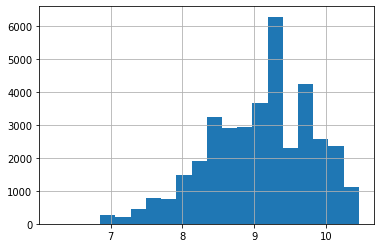

In [ ]:
# analyzing loan log amount did not get much inpu
loandataset["loan_amnt_log"] = np.log(loandataset["loan_amnt"])
loandataset["loan_amnt_log"].hist(bins=20)
plt.show()

In [ ]:
# Checking how many more column has null values
# used as a sanity check but didnt use in the analysis
# Added for future reference 
loandataset.isnull().sum()
obj = loandataset.isnull().sum()
for key,value in obj.iteritems():
  if(value != 0) :
    print(key,",",value)

emp_title , 1408
desc , 12097
title , 10
mths_since_last_delinq , 24206
revol_util , 47
last_pymnt_d , 66
last_credit_pull_d , 2
pub_rec_bankruptcies , 697
